In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,Dense
from tensorflow.keras.models import Sequential

In [48]:
dataset_train = pd.read_csv('trainset.csv')

In [49]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [50]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [51]:
train_set = dataset_train.iloc[:,1:2].values

In [52]:
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(train_set)

In [53]:
training_set_scaled.shape

(1259, 1)

In [54]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [55]:
X_train.shape

(1199, 60)

In [56]:
length = 60
n_features = 1

In [57]:
model = Sequential([
    SimpleRNN(50, input_shape = (length, n_features)),
    Dense(1)
])

C:\Users\SEC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.compile(optimizer='adam',loss='mse')

In [59]:
print("JANARTHANAN V K/n212222230051")
model.summary()

JANARTHANAN V K/n212222230051


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.fit(X_train1,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1005
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4125e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9904e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2303e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8198e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5556e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9160e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7656e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4793e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5795e-04
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1547e-04
Epoch 80/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3401e-04
Epoch 81/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2995e-04
Epoch 82/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0481e-04
Epoch 83/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9333e-04
Epoch 84/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1227e-04
Epoch 85/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7483e-04
Epoch 86/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2683e-04
Epoch 87/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9531e-04
Epoch 88/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6374e-04
Epoch 89/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9643e-04
Epoch 90/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1479e-04
Epoch 91/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1815e-04
Epoch 92/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8879e-04
Epoch 93/100
38/38 

In [61]:
print("JANARTHANAN V K\n212222230051")
model.summary()

JANARTHANAN V K
212222230051


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,955 (31.08 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,304 (20.72 KB)

In [62]:
dataset_test = pd.read_csv('testset.csv')

In [63]:
test_set = dataset_test.iloc[:,1:2].values

In [64]:
test_set.shape

(125, 1)

In [65]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [66]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=scaler.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [67]:
X_test.shape

(1324, 60, 1)

In [68]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price_scaled)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


JANARTHANAN V K
212222230051


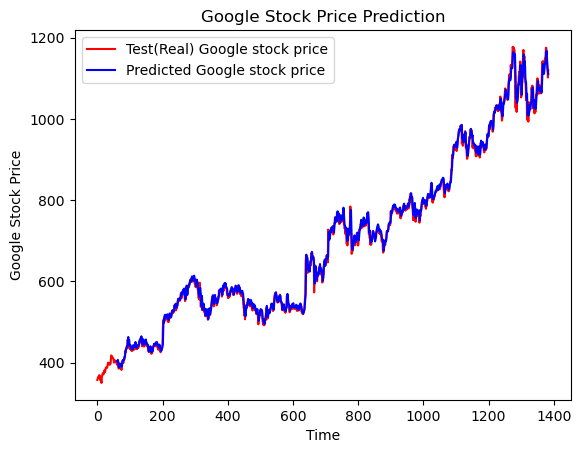

In [69]:
print("JANARTHANAN V K\n212222230051")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()